In [70]:
from preprocess.kepler_io import *
import matplotlib.pyplot as plt 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [69]:
csv_filename = f"C:/Users/User/dev/data/{csv_name}"
img_dir = "C:/Users/User/Desktop/images"

In [12]:
def __get_multiple_items_from_csv_by_IDs(kepids, item_names):
    # assert isinstance(item_names, list), \
    #     "second arguments should be list"
    global df
    if df is None:
        csv_path = os.path.join(csv_folder, csv_name_drop_unk)
        df = pd.read_csv(csv_path, comment="#")
    if not isinstance(kepids, list):
        kepids = [kepids]
    res = []
    for item_name in item_names:
        # assert item_name in df.columns, f"{csv_path} don't have '{item_name}'"
        res_each_item = {}
        for id_ in kepids:
            int_id = int(id_)
            target = df[df['kepid'] == int_id]

            training_set = target['av_training_set']
            target_is_pc = target[training_set == 'PC']
            target_non_pc = target[training_set != 'PC']

            pc_items = zip(repeat('1', len(target_is_pc)),
                           target_is_pc[item_name])
            non_pc_items = zip(repeat('0', len(target_non_pc)),
                               target_non_pc[item_name])
            res_each_item[f'{int_id:09d}'] = list(
                chain(pc_items, non_pc_items))
        res.append(res_each_item)
    return res

In [14]:
periods, durations, first_epochs = __get_multiple_items_from_csv_by_IDs(1162345, ['tce_period', 'tce_duration', 'tce_time0bk'])

In [19]:
print(periods)
print(durations)
print(first_epochs)

{'001162345': [('0', 0.83185), ('0', 0.831833), ('0', 0.831777)]}
{'001162345': [('0', 2.392), ('0', 2.181), ('0', 2.349)]}
{'001162345': [('0', 132.227), ('0', 131.91899999999998), ('0', 131.69799999999998)]}


In [77]:
depth.mean(), depth.max(), np.median(depth)

(12516.59606603808, 2322000.0, 125.5)

In [101]:
df = pd.read_csv(csv_filename, comment='#')
df.head()

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,tce_model_snr,tce_prad,tce_prad_err,tce_eqt,tce_eqt_err,tce_insol,tce_insol_err,tce_steff,tce_steff_err,tce_slogg,tce_slogg_err,tce_sradius,tce_sradius_err,av_training_set
0,1162345,2,NaN,0.831850,0.000067,132.227,0.035197,0.92600,1.471,2.392,21.0000,6.092,2.636,2.950,0.5099,0.7944,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
1,1292087,2,NaN,1.095240,0.000010,132.133,0.002685,0.25630,13.310,2.122,0.4755,34.530,4.427,10.600,0.8916,0.6361,2310.0,661.0,NaN,NaN,6328.0,207.0,4.15,0.29,1.502,0.852,UNK
2,1293031,2,NaN,0.719273,0.000014,132.227,0.002786,0.70000,1.103,1.521,0.3183,29.680,5.248,8.302,1.4550,0.4296,3330.0,703.0,NaN,NaN,6363.0,214.0,3.80,0.35,2.489,1.036,UNK
3,1162345,3,NaN,0.831833,0.000009,131.919,0.002209,0.09536,51.770,2.181,1.2110,27.100,3.550,11.950,0.9062,0.8488,2760.0,637.0,NaN,NaN,6510.0,207.0,4.07,0.26,1.728,0.791,AFP
4,1164109,1,NaN,622.408000,0.008547,162.256,0.009840,0.00319,2193.000,12.010,1.8430,161.300,59.080,3.719,2.1140,2.5990,302.0,75.0,NaN,NaN,6609.0,200.0,4.11,0.28,1.654,0.816,UNK


In [105]:
len(df)

20367

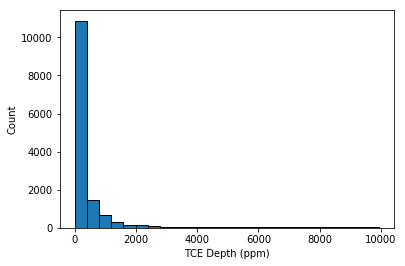

In [93]:
plt.hist(df[df['tce_depth']<10000]['tce_depth'], bins=25)
plt.ylabel('Count')
plt.xlabel('TCE Depth (ppm)')
plt.savefig(os.path.join(img_dir, 'tce_depth_hist.png'), dpi=200)

In [94]:
sum(depth>10000)

1831

In [72]:
def pie_chart(data, mid_points=(0.25, 0.5, 0.75), fname=None):
    parts = []
    labels = []
    interval = data.max() - data.min()
    points = [data.min()+interval*point for point in mid_points]
    eps = 1e-8
    for i in range(len(points)+1):
        lo = 0.0 if i == 0 else points[i-1]
        hi = (1.0+eps) if i == len(points) else points[i]
        part = len(data[(data>=lo) & (data<hi)]) / len(data)
        parts.append(part)
        if part < 0.05:
            part = None
            labels.append(part)
        else:
            labels.append(f'{part:.5f}')
    plt.pie(parts, labels=labels)
    if fname:
        plt.savefig(fname, dpi=200)

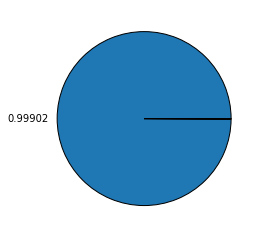

In [73]:
pie_chart(depth, fname=os.path.join(img_dir, 'tce_depth_pie.png'))

In [5]:
kepids = get_kepler_ids_from_csv()

In [6]:
print(kepids[:10], len(kepids))
test_id = 4390912

[4390912, 10223616, 8388610, 5308419, 6946819, 9764868, 4587528, 6062088, 7503885, 6291473] 12669


In [7]:
time, flux = get_time_flux_by_ID(4390912)

In [9]:
get_binned_normalized_flux_by_IDs(4390912)

 100.00%

(None, None)